# Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  
from sklearn.svm import SVR        #To build SVR model
from sklearn.tree import DecisionTreeRegressor       #To build Decision Tree model
from sklearn.ensemble import RandomForestRegressor   #To build Random Forest model
from sklearn.metrics import mean_squared_error, r2_score   #To calculate accuracy metrics: R2 and RMSE

# Data

In [2]:
cars_prices = pd.read_csv("C:\\Users\\jyoth\\OneDrive\\Desktop\\Internshala\\Mechademy\\cars_price.csv", index_col="S.No.")
cars_prices.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
S.No.,,,,,,,,,,,,
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [3]:
cars_prices.shape

(40000, 12)

In [4]:
cars_prices.isna().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [5]:
cars_prices.isna().sum()/cars_prices.shape[0]

make                   0.000000
model                  0.000000
priceUSD               0.000000
year                   0.000000
condition              0.000000
mileage(kilometers)    0.000000
fuel_type              0.000000
volume(cm3)            0.000750
color                  0.000000
transmission           0.000000
drive_unit             0.033625
segment                0.093875
dtype: float64

Since the null values make up only a small percentage of the data records, they are dropped.

In [6]:
cars_prices.dropna(inplace=True)

In [7]:
cars_prices.shape

(35016, 12)

In [8]:
#To get the distribution plot of some variables
def distplot(df, col):
    sns.distplot(df[col])
    plt.title('Distribution plot for '+ col)

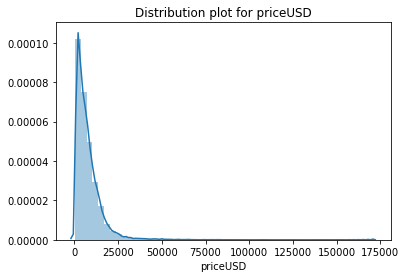

In [9]:
distplot(cars_prices, 'priceUSD')

From the above plot, we see that the distribution of the car prices is right skewed. This means that a large proportion of the cars are sold at a price in the lower range. Only a few of the cars in the dataset are luxury cars.

In [10]:
#Range of Mileage values
print("Max: ", cars_prices['mileage(kilometers)'].max())
print("Min: ", cars_prices['mileage(kilometers)'].min())

Max:  9999999.0
Min:  0.0


In [11]:
cars_prices[cars_prices['mileage(kilometers)']<50].shape

(327, 12)

In [12]:
#Range of Volume values
print("Max: ", cars_prices["volume(cm3)"].max())
print("Min: ", cars_prices["volume(cm3)"].min())

Max:  20000.0
Min:  500.0


In [13]:
cars_prices[cars_prices['volume(cm3)']<3000].shape

(30914, 12)

The Mileage and Volume values in the given dataset are not within their usual ranges.
Using domain knowledge,  a subset of the dataset containing more common and plausible Mileage and Volume values is considered.

# Subsetting the dataset

In [14]:
subdf = cars_prices[((cars_prices['mileage(kilometers)']>50) & (cars_prices['mileage(kilometers)']<1000000)) &(cars_prices['volume(cm3)']<7000)]

In [15]:
subdf.shape

(34422, 12)

In [16]:
subdf.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
S.No.,,,,,,,,,,,,
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


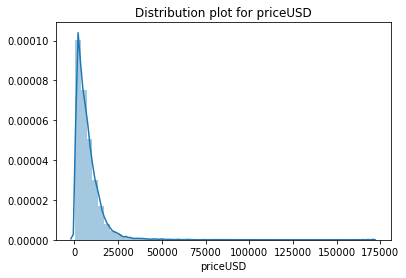

In [17]:
distplot(subdf, 'priceUSD')

# Bivariate

In [18]:
def scatterplot(df,col):
    sns.scatterplot(data=df, x=col, y='priceUSD')
    plt.ylabel('priceUSD')
    plt.xlabel(col)
    plt.title('Scatter plot for the column ' + col )
    plt.show()

In [19]:
def num_bivar(df,col):
    scatterplot(df,col)
    stat, p = stats.pearsonr(df[col], df['priceUSD'])
    print("t-test for Pearson's correlation coefficient")
    print('r=%.3f, p=%.3f' % (stat, p))

In [20]:
def boxplot(df,col):
    sns.boxplot(x=col, y='priceUSD',data=df)
    plt.ylabel('priceUSD')
    plt.xlabel(col)
    plt.title('Boxplot for the column ' + col )
    plt.show()

In [21]:
def kde(df, col):
    df.groupby([col])['priceUSD'].plot.kde()
    plt.ylabel('Probability')
    plt.xlabel('Car Prices (in USD)')
    plt.title('KDE Plot for the column ' + col )
    plt.legend(labels=df[col].unique().tolist())
    plt.show()

In [22]:
def cat_bivar(df, col):
    print("Mean:")
    print(round(df.groupby([col])['priceUSD'].mean(), 2))
    print("Boxplot:")
    boxplot(df,col)
    print("KDE Plot:")
    kde(df, col)
    print("Kruskal-Wallis Test:")
    print(stats.kruskal(*[group["priceUSD"].values for name, group in df.groupby(col)]))    

## Mileage

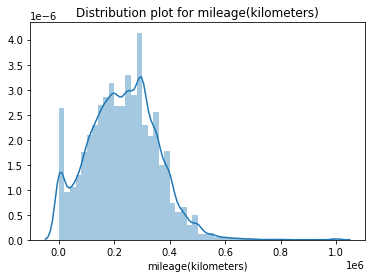

In [23]:
distplot(subdf, 'mileage(kilometers)')

In [24]:
# scatterplot(subdf[subdf['mileage(kilometers)']<500000],'mileage(kilometers)')

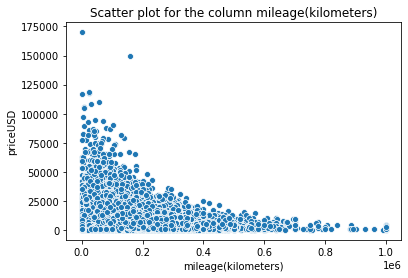

t-test for Pearson's correlation coefficient
r=-0.364, p=0.000


In [25]:
num_bivar(subdf, 'mileage(kilometers)')

The Pearson's correlation coefficient is 0.364. 
From the pvalue of the t-test, we reject the null hypothesis and conclude that this correlation is statistically significant. Hence, mileage does affect car prices.

## Volume

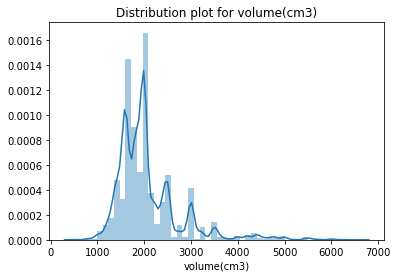

In [26]:
distplot(subdf, 'volume(cm3)')

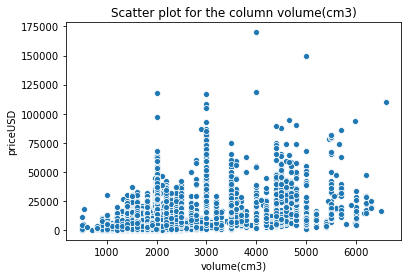

t-test for Pearson's correlation coefficient
r=0.377, p=0.000


In [27]:
num_bivar(subdf, 'volume(cm3)')

The Pearson's correlation coefficient is 0.377. 
From the pvalue of the t-test, we reject the null hypothesis and conclude that this correlation is statistically significant. Hence, volume does affect car prices.

## Year of manufacture

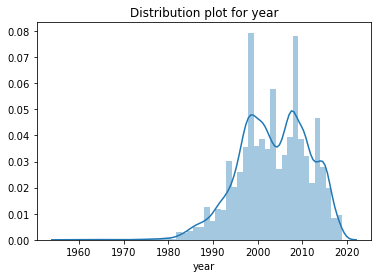

In [28]:
distplot(subdf, 'year')

From the above plot, we see that most of the cars were manufactured in the years falling in the 1990-2019 range

In [30]:
labels = ['[1937-1954]', '(1954-1970]', '(1970-1987]', '(1987-2003]', '(2003-2019]']
subdf['Year_CI'] = pd.cut(subdf['year'],bins=5, precision=0,include_lowest=True, labels=labels)

<ipython-input-30-8f560e6972d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['Year_CI'] = pd.cut(subdf['year'],bins=5, precision=0,include_lowest=True, labels=labels)


In [31]:
subdf['Year_CI'].value_counts()

(1987-2003]    16565
(2003-2019]    13814
(1970-1987]     3907
(1954-1970]      109
[1937-1954]       27
Name: Year_CI, dtype: int64

Mean:
Year_CI
[1937-1954]     5193.00
(1954-1970]     2008.28
(1970-1987]     1486.86
(1987-2003]     4204.05
(2003-2019]    12820.89
Name: priceUSD, dtype: float64
Boxplot:


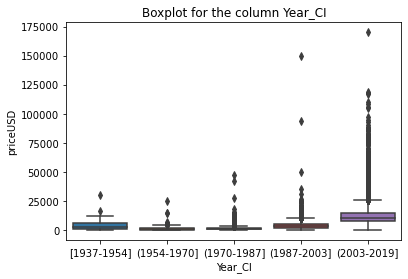

KDE Plot:


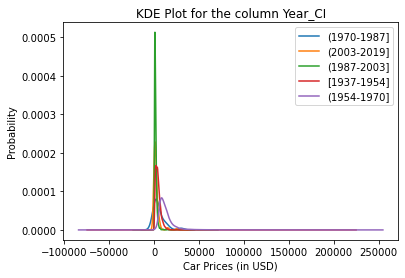

Kruskal-Wallis Test:
KruskalResult(statistic=20778.2297391446, pvalue=0.0)


In [32]:
cat_bivar(subdf, col='Year_CI')

To check if the car prices is affected by the Year of manufacture, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Year CI is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Year CI) is 0. 
Since the p-value is 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by the Year of manufacture. The same inferences can be drawn from the plots as well.

*CI - Class interval

## Condition

In [33]:
subdf.condition.value_counts()

with mileage    33935
with damage       256
for parts         231
Name: condition, dtype: int64

Mean:
condition
for parts        576.21
with damage     2770.48
with mileage    7428.13
Name: priceUSD, dtype: float64
Boxplot:


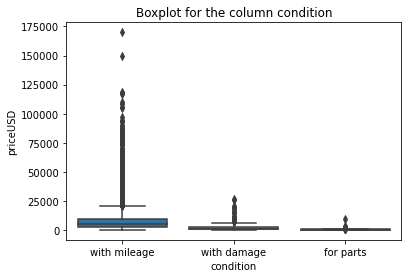

KDE Plot:


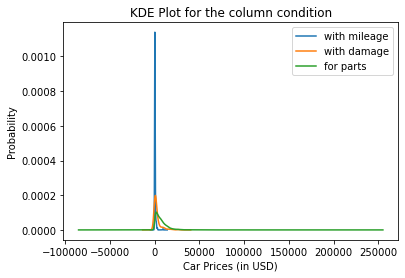

Kruskal-Wallis Test:
KruskalResult(statistic=869.2063104480819, pvalue=1.795758242261639e-189)


In [34]:
cat_bivar(subdf, col='condition')

To check if the car prices is affected by the Condition, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Condition is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Condition) is 0. 
Since the p-value is nearly 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by Condition. The same inferences can be drawn from the plots as well.

## Fuel Type

In [35]:
subdf.fuel_type.value_counts()

petrol    21916
diesel    12506
Name: fuel_type, dtype: int64

Mean:
fuel_type
diesel    8518.36
petrol    6679.39
Name: priceUSD, dtype: float64
Boxplot:


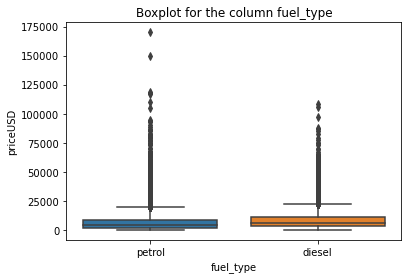

KDE Plot:


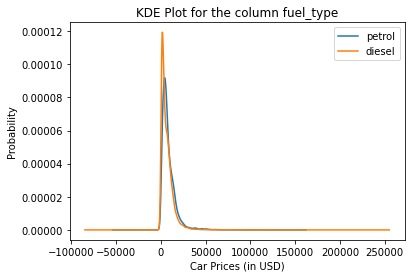

Kruskal-Wallis Test:
KruskalResult(statistic=947.6474062307191, pvalue=4.306653489928225e-208)


In [36]:
cat_bivar(subdf, col='fuel_type')

To check if the car prices is affected by the Fuel Type, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Fuel Type is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Fuel Type) is 0. 
Since the p-value is nearly 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by the type of fuel the vehicle uses. The same inferences can be drawn from the plots as well.

## Drive Unit

In [37]:
subdf.drive_unit.value_counts()

front-wheel drive             24277
rear drive                     4265
all-wheel drive                3785
part-time four-wheel drive     2095
Name: drive_unit, dtype: int64

Mean:
drive_unit
all-wheel drive               16494.03
front-wheel drive              5661.80
part-time four-wheel drive    12152.03
rear drive                     6465.69
Name: priceUSD, dtype: float64
Boxplot:


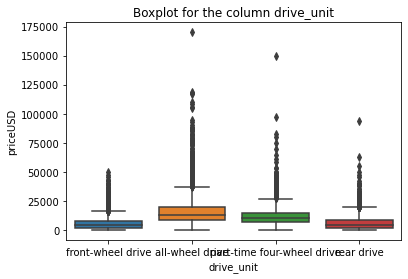

KDE Plot:


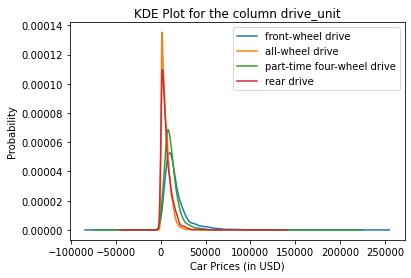

Kruskal-Wallis Test:
KruskalResult(statistic=6034.171613028816, pvalue=0.0)


In [38]:
cat_bivar(subdf, col='drive_unit')

To check if the car prices is affected by the Drive Unit, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Drive Unit is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Drive Unit) is 0. 
Since the p-value is 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by the Drive Unit of the vehicle. The same inferences can be drawn from the plots as well.

## Transmission

In [39]:
subdf.transmission.value_counts()

mechanics    22062
auto         12360
Name: transmission, dtype: int64

Mean:
transmission
auto         12150.81
mechanics     4656.52
Name: priceUSD, dtype: float64
Boxplot:


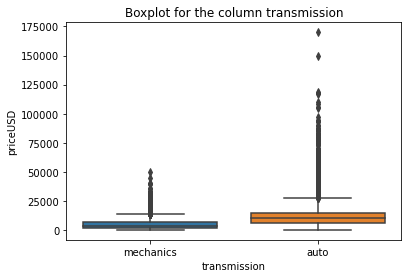

KDE Plot:


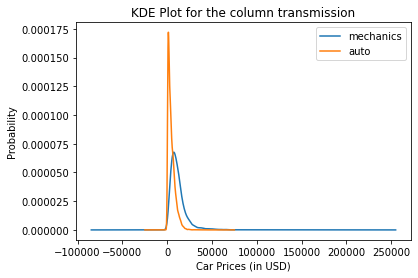

Kruskal-Wallis Test:
KruskalResult(statistic=9943.791363338385, pvalue=0.0)


In [40]:
cat_bivar(subdf,'transmission')

To check if the car prices is affected by the Transmission feature, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Transmission is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Transmission) is 0. 
Since the p-value is 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by the Transmission of the vehicle. The same inferences can be drawn from the plots as well.

## Segment

In [41]:
subdf.segment.value_counts()

D    8546
C    7055
J    5925
M    4303
E    4187
B    2935
F     632
S     531
A     308
Name: segment, dtype: int64

Mean:
segment
A     4393.29
B     4392.23
C     4958.47
D     5408.57
E     6268.68
F    10995.28
J    14343.64
M     6970.23
S    17501.36
Name: priceUSD, dtype: float64
Boxplot:


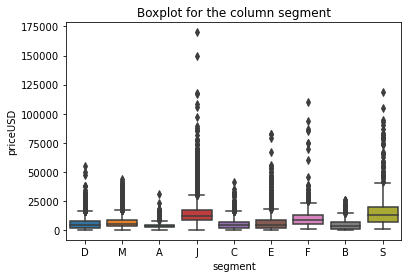

KDE Plot:


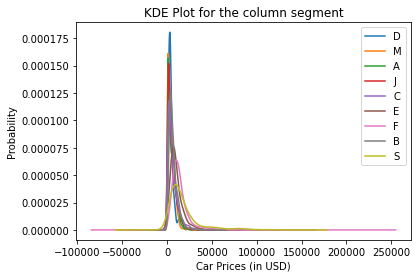

Kruskal-Wallis Test:
KruskalResult(statistic=8326.086866383002, pvalue=0.0)


In [42]:
cat_bivar(subdf, col='segment')

To check if the car prices is affected by the Segment feature, various plots were plotted and a Kruskal-Wallis test was conducted to see if the difference between the prices in each Segment is significant or not. 
The null hypothesis of Kruskal- Wallis test is that the sample mean of the car prices in each group (Segment) is 0. 
Since the p-value is 0, we can conclude that the null hypothesis is rejected, i.e. the car prices are affected by the Segment of the vehicle. The same inferences can be drawn from the plots as well.

## Colour

In [43]:
subdf.color.value_counts()

black       7715
silver      6250
blue        4977
gray        3590
white       3225
green       2328
other       2005
red         1631
burgundy    1236
brown        801
purple       383
yellow       163
orange       118
Name: color, dtype: int64

Mean:
color
black       10585.00
blue         5128.83
brown       12920.12
burgundy     4377.51
gray         8269.17
green        3068.38
orange       6908.36
other        6574.49
purple       4448.69
red          4417.06
silver       6240.90
white        9390.78
yellow       5775.88
Name: priceUSD, dtype: float64
Boxplot:


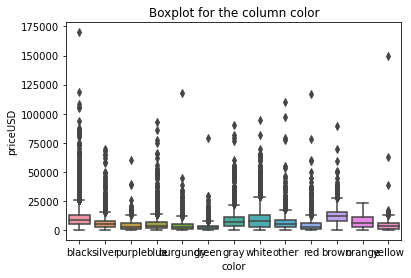

KDE Plot:


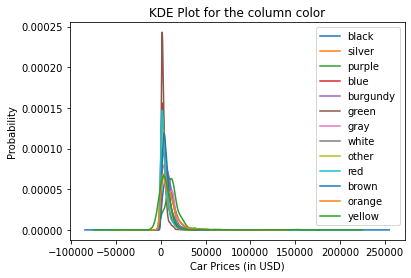

Kruskal-Wallis Test:
KruskalResult(statistic=6233.248777347007, pvalue=0.0)


In [44]:
cat_bivar(subdf,'color')

Observing the p-value from the Kruskal-Wallis test (pvalue=0), we conclude that the colour of the car also affects the price at which the car is sold.

# Model Building

In [45]:
subdf.columns

Index(['make', 'model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)',
       'fuel_type', 'volume(cm3)', 'color', 'transmission', 'drive_unit',
       'segment', 'Year_CI'],
      dtype='object')

In [52]:
subdf.head()

,priceUSD,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,Year_CI
S.No.,,,,,,,,,,
0,565,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,(1970-1987]
1,5550,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,(2003-2019]
2,8300,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,(2003-2019]
3,3300,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,(1987-2003]
4,2450,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,(1987-2003]


In [46]:
subdf.drop(['make', 'model', 'year'], axis=1, inplace=True)

C:\Users\jyoth\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
cars=pd.get_dummies(subdf, columns=['condition','fuel_type','color','transmission','drive_unit', 'segment', 'Year_CI'])

In [54]:
X = cars.drop('priceUSD', axis=1)
y = cars['priceUSD']

In [55]:
#Splitting the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Decision Tree

In [56]:
dtr = DecisionTreeRegressor(criterion="mse",random_state=0)

In [57]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [58]:
pred = dtr.predict(X_test)

In [61]:
print("RMSE:",sqrt(mean_squared_error(y_test, pred)))
print("r2 score:",r2_score(y_test,pred))

RMSE: 5219.984484178388
r2 score: 0.5111072173053397


In [63]:
dtr_parameters = {"max_depth": [3, None],
             "criterion": ["mse"],
              "max_features": stats.randint(1, X.shape[1]),       # [1,2,3,4,5,6,7,8,9, "log2", "sqrt"], 
              "min_samples_leaf": stats.randint(1, X.shape[1])}

In [64]:
#Using RandomizedSearchCV to obtain the most optimal combination of hyperparameters for the Decision Tree Regressor
random_search = RandomizedSearchCV(estimator = dtr,
                       param_distributions = dtr_parameters,
                       scoring = 'r2',                   #sorted(sklearn.metrics.SCORERS.keys())---to see 
                       cv = 10,
                       n_jobs = -1)
random_search = random_search.fit(X_train, y_train)
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 62.81 %
Best Parameters: {'criterion': 'mse', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 2}


In [65]:
#Building a Decision Tree Regressor with the best hyperparameter values, obtained above
dtr_best = DecisionTreeRegressor(criterion="mse", max_depth=None, max_features= 5, min_samples_leaf=2, random_state=0)

In [66]:
dtr_best.fit(X_train,y_train)

DecisionTreeRegressor(max_features=5, min_samples_leaf=2, random_state=0)

In [68]:
pred_best = dtr_best.predict(X_test)

In [69]:
print("RMSE:",sqrt(mean_squared_error(y_test, pred_best)))
print("r2 score:",r2_score(y_test,pred_best))

RMSE: 4299.305911695404
r2 score: 0.6683561886240861


## Random Forest

In [70]:
rfr = RandomForestRegressor()

In [71]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
#Obtaining the importance of all the features in the Random Forest Regressor model
feature_imp = pd.Series(rfr.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print("Important Features are :\n",feature_imp)

Important Features are :
 Year_CI_(2003-2019]                      0.338701
mileage(kilometers)                      0.231108
volume(cm3)                              0.188559
drive_unit_front-wheel drive             0.077137
segment_J                                0.012615
fuel_type_petrol                         0.012351
drive_unit_all-wheel drive               0.012291
fuel_type_diesel                         0.012113
color_black                              0.008487
transmission_mechanics                   0.008248
transmission_auto                        0.008173
drive_unit_part-time four-wheel drive    0.006100
segment_E                                0.005644
color_white                              0.005608
segment_S                                0.005308
color_yellow                             0.005145
color_silver                             0.005098
color_gray                               0.004986
segment_M                                0.004627
color_blue              

From the above, we see that the features affect car prices the most are Year, Mileage and Volume.

In [73]:
rfr_pred = rfr.predict(X_test)

In [74]:
print("RMSE: ",sqrt(mean_squared_error(y_test, rfr_pred)))
print("r2: ",r2_score(y_test,rfr_pred))

RMSE:  3745.14085724511
r2:  0.7483415515689693
